In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
import datetime


%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

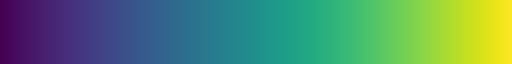

In [3]:
import matplotlib.cm as cm
cm.get_cmap(name='viridis')

crisis1 = pd.read_excel('../data/crisis1.xlsx', skiprows = 2)

print(crisis1.head())

crisis2 = pd.read_excel('../data/crisis2.xlsx', skiprows = 2)

print(crisis2.head())

crisis1.tail()

crisis2.tail()

crisis1.dropna(axis=1, how='all', inplace=True)
crisis1.head()

crisis2.dropna(axis=1, how='all', inplace=True)
crisis2.head()

crisis1.info()

crisis2.info()

print(crisis1.dtypes)

print(crisis2.dtypes)

In [4]:
#I think the best way to read the call volume xlsx is to make individual DataFrames for each section of each tab
#example: 2020_stats as A11:B20, 2020_queue_dist as A24:I36, etc.
#this will require quite a bit of pd.read_excel kwargs but I think it will be worth it (and maybe necessary)

#### 2020 DataFrames

In [5]:
stats_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=10, nrows=9, usecols='A:B')
stats_2020.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
#stats_2020['Total'].sub(' calls', '') this didn't work the way I wanted it to, commenting it out until I figure out how to fix it
stats_2020

,Category,Total
0,Number of Received Calls,45772 calls
1,Number of Answered Calls,28483 calls
2,Number of Abandoned Unanswered Call,9484 calls
3,Number of Other Unanswered Calls,6829 calls
4,Number of Transferred Calls,976 calls
5,Unanswered Rate,0.1492
6,Abandon Rate,0.2072
7,Agent Login,33332
8,Agent Logoff,33313


In [6]:
queue_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=23, nrows=12, usecols='A:I')
queue_dist_2020

,Queue,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait
0,AWARE,11,8,3,0,0.7273,0.2727,00:02:04,00:01:44
1,Crisis Eng,22704,15281,7264,159,0.6681,0.3143,00:10:54,00:01:34
2,Crisis Eng PRIORITY,3200,2070,1056,74,0.6700,0.3300,00:10:32,00:01:59
3,Crisis Spanish,153,107,39,7,0.7355,0.2516,00:08:30,00:02:11
4,Crisis Spanish PRIORITY,16,13,2,1,0.8750,0.1250,00:07:50,00:01:58
5,Lifeline,6132,3542,2493,97,0.5934,0.4066,00:11:34,00:00:33
6,MHART,120,75,45,0,0.5474,0.3285,00:07:18,00:00:23
7,Pet Loss,0,0,0,0,0.0000,0.0000,00:00:00,00:00:00
8,REDLINE,11708,6422,4752,534,0.5941,0.4059,00:05:42,00:00:29
9,Referral Line,1358,888,366,104,0.7305,0.2695,00:03:32,00:00:24


In [7]:
month_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=39, nrows=12, usecols='A:K')
month_dist_2020

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,2020-01,2880,1795,1033,52,0.6413,0.3587,00:08:58,00:01:15,3160,3160
1,2020-02 (2020-02),2704,1698,936,70,0.6538,0.3462,00:10:08,00:01:03,3462,3450
2,2020-03 (2020-03),4059,2537,1347,175,0.6681,0.3319,00:08:05,00:00:54,3223,3217
3,2020-04 (2020-04),3385,2152,1147,86,0.6612,0.3388,00:09:23,00:01:04,2758,2750
4,2020-05 (2020-05),3721,2239,1388,94,0.6270,0.3730,00:10:32,00:01:18,2369,2377
5,2020-06 (2020-06),3693,2221,1413,59,0.6174,0.3826,00:10:18,00:01:10,2415,2415
6,2020-07 (2020-07),3919,2543,1296,80,0.6693,0.3307,00:10:04,00:00:58,2678,2671
7,2020-08 (2020-08),4390,2527,1803,60,0.5893,0.4107,00:10:15,00:01:23,2465,2479
8,2020-09 (2020-09),3967,2442,1464,61,0.6310,0.3690,00:10:19,00:01:16,3087,3070
9,2020-10 (2020-10),4143,2617,1480,46,0.6428,0.3572,00:09:30,00:01:19,2887,2889


In [8]:
day_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=55, nrows=7, usecols='A:K')
day_dist_2020

,Day,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,6864,3576,3174,114,0.5376,0.4624,00:10:17,00:01:28,3641,3624
1,Monday,6811,4472,2187,152,0.6789,0.3211,00:08:38,00:00:59,5549,5576
2,Tuesday,6289,4138,2046,105,0.6747,0.3253,00:09:34,00:01:06,5544,5620
3,Wednesday,6608,4463,1981,164,0.7002,0.2998,00:09:13,00:00:58,5538,5696
4,Thursday,6370,4212,2003,155,0.6856,0.3144,00:09:34,00:00:59,4696,4779
5,Friday,6119,3939,2032,148,0.6679,0.3321,00:09:15,00:01:06,4646,4383
6,Saturday,6711,3683,2890,138,0.5694,0.4306,00:09:54,00:01:25,3718,3635


In [9]:
queue_answered_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=66, nrows=10, usecols='A:C')
queue_answered_2020

,Queue,Count,%
0,AWARE,8 calls,0.0003
1,Crisis Eng,15281 calls,0.5365
2,Crisis Eng PRIORITY,2070 calls,0.0727
3,Crisis Spanish,107 calls,0.0038
4,Crisis Spanish PRIORITY,13 calls,0.0005
5,Lifeline,3542 calls,0.1244
6,MHART,75 calls,0.0026
7,REDLINE,6422 calls,0.2255
8,Referral Line,888 calls,0.0312
9,SAMHSA,77 calls,0.0027


In [10]:
service_speed_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=80, nrows=10, usecols='A:D')
service_speed_2020

,Answer,Count,Delta,%
0,Within 15 secs,21405 calls,21405,0.7266
1,Within 30 secs,25052 calls,3647,0.8504
2,Within 45 secs,26068 calls,1016,0.8849
3,Within 60 secs,26734 calls,666,0.9075
4,Within 75 secs,27090 calls,356,0.9196
5,Within 90 secs,27310 calls,220,0.9271
6,Within 105 secs,27492 calls,182,0.9332
7,Within 120 secs,27677 calls,185,0.9395
8,Within 135 secs,27722 calls,45,0.9410
9,Within 150+ secs,29459 calls,1737,1.0000


In [11]:
abandon_rate_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=94, nrows=10, usecols='A:D')
abandon_rate_2020

,Unanswer,Count,Delta,%
0,Within 15 secs,432 calls,432,0.0265
1,Within 30 secs,2012 calls,1580,0.1233
2,Within 45 secs,3656 calls,1644,0.2241
3,Within 60 secs,8659 calls,5003,0.5308
4,Within 75 secs,11113 calls,2454,0.6812
5,Within 90 secs,11637 calls,524,0.7134
6,Within 105 secs,12062 calls,425,0.7394
7,Within 120 secs,12403 calls,341,0.7603
8,Within 135 secs,12981 calls,578,0.7957
9,Within 150+ secs,16313 calls,3332,1.0000


#### 2021 DataFrames

In [12]:
stats_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=10, nrows=9, usecols='A:B')
stats_2021.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
stats_2021

,Category,Total
0,Number of Received Calls,53975 calls
1,Number of Answered Calls,37036 calls
2,Number of Abandoned Unanswered Call,10841 calls
3,Number of Other Unanswered Calls,5215 calls
4,Number of Transferred Calls,883 calls
5,Unanswered Rate,0.0966
6,Abandon Rate,0.2009
7,Agent Login,37571
8,Agent Logoff,37534


In [13]:
queue_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=23, nrows=11, usecols='A:I')
queue_dist_2021

,Queue,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait
0,Community Response,35,21,13,1,0.6111,0.3611,00:04:21,00:00:32
1,Crisis Eng,28017,20723,7152,142,0.7390,0.2533,00:11:20,00:01:25
2,Crisis Eng PRIORITY,4254,2864,1331,59,0.6871,0.3129,00:07:01,00:01:17
3,Crisis Spanish,248,213,28,7,0.8765,0.1116,00:07:23,00:00:55
4,Crisis Spanish PRIORITY,36,27,8,1,0.7778,0.2222,00:10:14,00:01:02
5,Lifeline,6223,4021,2009,193,0.6772,0.3228,00:11:25,00:01:00
6,MHART,497,328,165,4,0.6680,0.3320,00:07:06,00:00:24
7,REDLINE,13516,8068,4977,471,0.6318,0.3682,00:04:28,00:00:27
8,Referral Line,951,728,218,5,0.7708,0.2292,00:03:50,00:00:23
9,SAMHSA,198,43,155,0,0.2172,0.7828,00:10:48,00:00:14


In [14]:
month_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=38, nrows=12, usecols='A:K')
month_dist_2021

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,2021-01,4743,3094,1556,93,0.6719,0.3281,00:08:25,00:01:02,2485,2469
1,2021-02 (2021-02),4627,3103,1458,66,0.6849,0.3151,00:08:05,00:01:02,2853,2850
2,2021-03 (2021-03),4700,3305,1322,73,0.7187,0.2813,00:08:59,00:01:08,3420,3414
3,2021-04 (2021-04),4450,3175,1236,39,0.7222,0.2778,00:08:41,00:01:04,3103,3091
4,2021-05 (2021-05),4472,2996,1390,86,0.6892,0.3108,00:09:17,00:01:08,2680,2680
5,2021-06 (2021-06),4349,3065,1198,86,0.7245,0.2755,00:09:11,00:01:09,3258,3249
6,2021-07 (2021-07),4591,3029,1475,87,0.6787,0.3213,00:09:18,00:01:15,2751,2778
7,2021-08 (2021-08),4314,3028,1200,86,0.7218,0.2782,00:09:40,00:01:04,2939,2921
8,2021-09 (2021-09),4667,3296,1304,67,0.7206,0.2794,00:09:05,00:01:00,3431,3439
9,2021-10 (2021-10),4293,2878,1360,55,0.6832,0.3168,00:10:12,00:01:10,3250,3259


In [15]:
hour_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=54, nrows=24, usecols='A:K')
hour_dist_2021

,Hour,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,00:00 - 00:59,1709,1020,670,19,0.6080,0.3920,00:09:27,00:01:40,226,253
1,01:00 - 01:59,1409,832,570,7,0.5955,0.4045,00:09:29,00:01:40,424,471
2,02:00 - 02:59,1139,592,533,14,0.5320,0.4680,00:09:24,00:01:52,409,1574
3,03:00 - 03:59,943,544,385,14,0.5917,0.4083,00:11:00,00:01:49,125,179
4,04:00 - 04:59,853,509,334,10,0.6084,0.3916,00:09:52,00:02:02,160,179
5,05:00 - 05:59,1059,697,357,5,0.6629,0.3371,00:09:47,00:01:33,1897,283
6,06:00 - 06:59,1346,1043,288,15,0.7860,0.2140,00:08:49,00:00:45,2922,4539
7,07:00 - 07:59,1586,1156,407,23,0.7434,0.2566,00:09:21,00:00:54,1462,807
8,08:00 - 08:59,2123,1494,572,57,0.7306,0.2694,00:10:26,00:00:49,1327,1202
9,09:00 - 09:59,2136,1586,496,54,0.7678,0.2322,00:09:02,00:00:45,1567,1464


In [16]:
day_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=82, nrows=7, usecols='A:K')
day_dist_2021

,Day,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,7729,4656,3003,70,0.6115,0.3885,00:10:09,00:01:25,4966,4747
1,Monday,7866,5817,1919,130,0.7560,0.2440,00:08:49,00:00:52,5873,5913
2,Tuesday,7763,5621,2013,129,0.7407,0.2593,00:09:12,00:01:00,5803,5704
3,Wednesday,7576,5746,1679,151,0.7784,0.2216,00:08:51,00:00:52,5978,5816
4,Thursday,7599,5735,1688,176,0.7779,0.2221,00:08:41,00:00:51,6189,6234
5,Friday,7567,5206,2229,132,0.7054,0.2946,00:09:05,00:01:02,5111,5433
6,Saturday,7875,4255,3525,95,0.5524,0.4476,00:10:31,00:01:33,3651,3687


In [17]:
service_speed_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=93, nrows=10, usecols='A:D')
service_speed_2021

,Answer,Count,Delta,%
0,Within 15 secs,27645 calls,27645,0.7291
1,Within 30 secs,32077 calls,4432,0.8459
2,Within 45 secs,33423 calls,1346,0.8814
3,Within 60 secs,34160 calls,737,0.9009
4,Within 75 secs,34615 calls,455,0.9129
5,Within 90 secs,34985 calls,370,0.9226
6,Within 105 secs,35301 calls,316,0.9310
7,Within 120 secs,35550 calls,249,0.9375
8,Within 135 secs,35676 calls,126,0.9408
9,Within 150+ secs,37919 calls,2243,1.0000


In [18]:
abandon_rate_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=107, nrows=10, usecols='A:D')
abandon_rate_2021

,Unanswer,Count,Delta,%
0,Within 15 secs,239 calls,239,0.0149
1,Within 30 secs,1708 calls,1469,0.1064
2,Within 45 secs,3549 calls,1841,0.2210
3,Within 60 secs,7591 calls,4042,0.4728
4,Within 75 secs,9167 calls,1576,0.5709
5,Within 90 secs,9823 calls,656,0.6118
6,Within 105 secs,10303 calls,480,0.6417
7,Within 120 secs,10741 calls,438,0.6690
8,Within 135 secs,11422 calls,681,0.7114
9,Within 150+ secs,16056 calls,4634,1.0000


#### 2022 DataFrames

In [19]:
stats_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=7, nrows=9, usecols='A:B')
stats_2022.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
stats_2022

,Category,Total
0,Number of Received Calls,17265 calls
1,Number of Answered Calls,13201 calls
2,Number of Abandoned Unanswered Call,2749 calls
3,Number of Other Unanswered Calls,1097 calls
4,Number of Transferred Calls,218 calls
5,Unanswered Rate,0.0635
6,Abandon Rate,0.1592
7,Agent Login,14498
8,Agent Logoff,14514


In [20]:
queue_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=18, nrows=10, usecols='A:I')
queue_dist_2022

,Queue,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait
0,Community Response,2,2,0,0,100.00,0.00,00:06:19,00:00:10
1,Crisis Eng,10356,8273,2049,34,79.81,19.69,00:11:10,00:01:02
2,Crisis Eng PRIORITY,907,677,213,17,76.52,23.48,00:09:05,00:01:11
3,Crisis Spanish,65,49,15,1,76.92,23.08,00:07:19,00:00:59
4,Crisis Spanish PRIORITY,13,8,5,0,61.54,38.46,00:07:49,00:01:10
5,Lifeline,1851,1353,447,51,75.85,24.15,00:11:44,00:00:48
6,MHART,7,7,0,0,100.00,0.00,00:00:38,00:00:10
7,REDLINE,3651,2491,1052,108,71.19,28.81,00:04:45,00:00:23
8,Referral Line,410,341,62,7,84.88,15.12,00:04:42,00:00:18
9,SAMHSA,3,0,3,0,0.00,100.00,00:00:00,00:00:15


In [21]:
month_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=32, nrows=4, usecols='A:K')
month_dist_2022

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,2022-01,5090,3696,1329,65,0.7389,0.2611,00:09:38,00:00:58,3408,3426
1,2022-02 (2022-02),4127,3236,840,51,0.7965,0.2035,00:09:12,00:00:49,3568,3559
2,2022-03 (2022-03),4034,3080,898,56,0.7774,0.2226,00:10:07,00:00:53,3688,3704
3,2022-04,4014,3189,779,46,0.8059,0.1941,00:09:49,00:00:46,3834,3825


In [22]:
hour_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=40, nrows=24, usecols='A:K')
hour_dist_2022

,Hour,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,00:00 - 00:59,561,416,140,5,0.7504,0.2496,00:10:28,00:01:24,78,109
1,01:00 - 01:59,468,350,116,2,0.7521,0.2479,00:10:11,00:01:12,124,412
2,02:00 - 02:59,414,290,120,4,0.7101,0.2899,00:09:46,00:01:04,77,394
3,03:00 - 03:59,327,225,98,4,0.7003,0.2997,00:09:25,00:01:14,26,51
4,04:00 - 04:59,328,254,69,5,0.7896,0.2104,00:08:40,00:00:54,18,34
5,05:00 - 05:59,370,261,103,6,0.7216,0.2784,00:09:21,00:01:03,527,115
6,06:00 - 06:59,473,414,50,9,0.8943,0.1057,00:09:03,00:00:30,1216,1716
7,07:00 - 07:59,507,428,77,2,0.8481,0.1519,00:09:13,00:00:29,492,198
8,08:00 - 08:59,611,509,95,7,0.8445,0.1555,00:10:20,00:00:37,636,420
9,09:00 - 09:59,669,557,97,15,0.8550,0.1450,00:08:43,00:00:36,457,504


In [23]:
day_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=68, nrows=7, usecols='A:K')
day_dist_2022

,Day,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,2680,1780,884,16,0.6701,0.3299,00:10:16,00:01:09,1615,1490
1,Monday,2766,2131,587,48,0.7878,0.2122,00:09:03,00:00:45,2290,2215
2,Tuesday,2515,2043,444,28,0.8235,0.1765,00:08:55,00:00:42,2054,2016
3,Wednesday,2334,1894,406,34,0.8260,0.1740,00:09:59,00:00:44,2501,2470
4,Thursday,2179,1823,317,39,0.8545,0.1455,00:09:25,00:00:40,2368,2378
5,Friday,2371,1884,451,36,0.8098,0.1902,00:09:15,00:00:45,2026,2151
6,Saturday,2420,1646,757,17,0.6872,0.3128,00:11:18,00:01:15,1644,1794


In [24]:
service_speed_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=80, nrows=10, usecols='A:D')
service_speed_2022

,Answer,Count,Delta,%
0,Within 15 secs,10235 calls,10235,0.7627
1,Within 30 secs,11684 calls,1449,0.8707
2,Within 45 secs,12079 calls,395,0.9001
3,Within 60 secs,12290 calls,211,0.9159
4,Within 75 secs,12456 calls,166,0.9282
5,Within 90 secs,12572 calls,116,0.9369
6,Within 105 secs,12667 calls,95,0.9440
7,Within 120 secs,12749 calls,82,0.9501
8,Within 135 secs,12781 calls,32,0.9525
9,Within 150+ secs,13419 calls,638,1.0000


In [25]:
abandon_rate_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=94, nrows=10, usecols='A:D')
abandon_rate_2022

,Unanswer,Count,Delta,%
0,Within 15 secs,15 calls,15,0.0039
1,Within 30 secs,402 calls,387,0.1045
2,Within 45 secs,859 calls,457,0.2233
3,Within 60 secs,1929 calls,1070,0.5016
4,Within 75 secs,2154 calls,225,0.5601
5,Within 90 secs,2340 calls,186,0.6084
6,Within 105 secs,2487 calls,147,0.6466
7,Within 120 secs,2596 calls,109,0.6750
8,Within 135 secs,2767 calls,171,0.7194
9,Within 150+ secs,3846 calls,1079,1.0000


### DataFrame Cheat Sheet
##### 2020:
- stats_2020  -- high-level statistics about total number of calls, unanswered/disconnected rates, etc.
- queue_dist_2020 -- distribution of calls across all queue services
- month_dist_2020 -- distribution of calls by month
- day_dist_2020 -- distribution of calls by day of week
- queue_answered_2020 -- answered calls across all queue services
- service_speed_2020 -- speed of answer in time categories
- abandon_rate_2020 -- speed of caller abandoning call in time categories

##### 2021:
- stats_2021  -- high-level statistics about total number of calls, unanswered/disconnected rates, etc.
- queue_dist_2021 -- distribution of calls across all queue services
- month_dist_2021 -- distribution of calls by month
- hour_dist_2021 -- distribution of calls by hour
- day_dist_2021 -- distribution of calls by day of week
- service_speed_2021 -- speed of answer in time categories
- abandon_rate_2021 -- speed of caller abandoning call in time categories

##### 2022:
- stats_2022  -- high-level statistics about total number of calls, unanswered/disconnected rates, etc.
- queue_dist_2022 -- distribution of calls across all queue services
- month_dist_2022 -- distribution of calls by month
- hour_dist_2022 -- distribution of calls by hour
- day_dist_2022 -- distribution of calls by day of week
- service_speed_2022 -- speed of answer in time categories
- abandon_rate_2022 -- speed of caller abandoning call in time categories

##### 3-way mutual DFs (with caveats) and other notes to look for
- **general note: 2022 is only through April, so we need to be sure to normalize everything to 1 and compare percentage distribution not count distribution**
- stats_(year)
- queue_dist_(year)   __   *not every queue was open every year, this is an apples to pears situation*
- month_dist_(year)   __   *2022 only has 4 months in this DF*
- day_dist_(year)
- service_speed_(year)
- abandon_rate_(year)   __   *this isn't a caveat, just a note to say I'm not clear on who does the abandoning and we may want to confirm with Teachers / Katherine unless I'm being dumb and a groupmember can clear this up for me*

##### singletons
- queue_answered_2020   __   *I'll check this myself, but what's in this DF that isn't in the queue_dist one?*
- hour_dist_2021 and hour_dist_2022   __   *hour data not included in 2020*

color codes
b: blue
g: green
r: red
c: cyan
m: magenta
y: yellow
k: black
w: white

#day_dist_2020.hist(column='Received', by='Day') -- wanted a histogram but I think I need to just do a bar plot
plt.figure(figsize=(15,10))
plt.bar(day_dist_2020['Day'], day_dist_2020['Received'])
plt.title('Received Calls by Day of Week - 2020')
plt.ylabel('Call Count')
plt.xticks(rotation=50)
plt.show()

plt.figure(figsize=(15,10))
plt.bar(day_dist_2021['Day'], day_dist_2021['Received'], color='m')
plt.title('Received Calls by Day of Week - 2021')
plt.ylabel('Call Count')
plt.xticks(rotation=50)
plt.show()

plt.figure(figsize=(15,10))
plt.bar(day_dist_2022['Day'], day_dist_2022['Received'], color='g')
plt.title('Received Calls by Day of Week - 2022')
plt.ylabel('Call Count')
plt.xticks(rotation=50)
plt.show()

#this is an attempt at a clustered bar chart to have the same distribution between weekdays for each year, rather than 3 charts
#I know in advance that, even if it works, this will have issues, because it isn't normalized to % of call volume
#I am working with counts for now, but the 2022 data only has 4 months worth of calls, so it should be skewed downward
x = day_dist_2020['Day']
y1 = day_dist_2020['Received']
y2 = day_dist_2021['Received']
y3 = day_dist_2022['Received']
width = 0.2
plt.bar(x-0.2, y1, width, color='c')
plt.bar(x, y2, width, color='m')
plt.bar(x+0.2, y3, width, color='y')
#this didn't work because the x axis and offset attempt doesn't work on strings (ex, 'Sunday' rather than 1)
#leaving for reference

#attempt 2
y1 = day_dist_2020['Received']
y2 = day_dist_2021['Received']
y3 = day_dist_2022['Received']
width = 0.2
plt.bar(day_dist_2020['Day'], y1, width, color='c')
plt.bar(day_dist_2021['Day'], y2, width, color='m')
plt.bar(day_dist_2022['Day'], y3, width, color='y')
#this sort of worked, but also definitely didn't work. keeping for reference again. Maybe I need to merge the DFs...
#also with fresh eyes next class, this doesn't do what I wanted it to, literally at all. I must have been tired when I thought it worked

In [26]:
day_dist1 = pd.merge(day_dist_2020, day_dist_2021, on='Day', how='inner')
day_dist1

,Day,Received_x,Answered_x,Unanswered_x,Transfers_x,% Answ_x,% Unansw_x,Avg Durat._x,Avg Wait_x,Logins_x,Logoff_x,Received_y,Answered_y,Unanswered_y,Transfers_y,% Answ_y,% Unansw_y,Avg Durat._y,Avg Wait_y,Logins_y,Logoff_y
0,Sunday,6864,3576,3174,114,0.5376,0.4624,00:10:17,00:01:28,3641,3624,7729,4656,3003,70,0.6115,0.3885,00:10:09,00:01:25,4966,4747
1,Monday,6811,4472,2187,152,0.6789,0.3211,00:08:38,00:00:59,5549,5576,7866,5817,1919,130,0.7560,0.2440,00:08:49,00:00:52,5873,5913
2,Tuesday,6289,4138,2046,105,0.6747,0.3253,00:09:34,00:01:06,5544,5620,7763,5621,2013,129,0.7407,0.2593,00:09:12,00:01:00,5803,5704
3,Wednesday,6608,4463,1981,164,0.7002,0.2998,00:09:13,00:00:58,5538,5696,7576,5746,1679,151,0.7784,0.2216,00:08:51,00:00:52,5978,5816
4,Thursday,6370,4212,2003,155,0.6856,0.3144,00:09:34,00:00:59,4696,4779,7599,5735,1688,176,0.7779,0.2221,00:08:41,00:00:51,6189,6234
5,Friday,6119,3939,2032,148,0.6679,0.3321,00:09:15,00:01:06,4646,4383,7567,5206,2229,132,0.7054,0.2946,00:09:05,00:01:02,5111,5433
6,Saturday,6711,3683,2890,138,0.5694,0.4306,00:09:54,00:01:25,3718,3635,7875,4255,3525,95,0.5524,0.4476,00:10:31,00:01:33,3651,3687


In [27]:
day_dist = pd.merge(day_dist1, day_dist_2022, on='Day', how='inner')
day_dist
#alright, need to change the column names

,Day,Received_x,Answered_x,Unanswered_x,Transfers_x,% Answ_x,% Unansw_x,Avg Durat._x,Avg Wait_x,Logins_x,Logoff_x,Received_y,Answered_y,Unanswered_y,Transfers_y,% Answ_y,% Unansw_y,Avg Durat._y,Avg Wait_y,Logins_y,Logoff_y,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,6864,3576,3174,114,0.5376,0.4624,00:10:17,00:01:28,3641,3624,7729,4656,3003,70,0.6115,0.3885,00:10:09,00:01:25,4966,4747,2680,1780,884,16,0.6701,0.3299,00:10:16,00:01:09,1615,1490
1,Monday,6811,4472,2187,152,0.6789,0.3211,00:08:38,00:00:59,5549,5576,7866,5817,1919,130,0.7560,0.2440,00:08:49,00:00:52,5873,5913,2766,2131,587,48,0.7878,0.2122,00:09:03,00:00:45,2290,2215
2,Tuesday,6289,4138,2046,105,0.6747,0.3253,00:09:34,00:01:06,5544,5620,7763,5621,2013,129,0.7407,0.2593,00:09:12,00:01:00,5803,5704,2515,2043,444,28,0.8235,0.1765,00:08:55,00:00:42,2054,2016
3,Wednesday,6608,4463,1981,164,0.7002,0.2998,00:09:13,00:00:58,5538,5696,7576,5746,1679,151,0.7784,0.2216,00:08:51,00:00:52,5978,5816,2334,1894,406,34,0.8260,0.1740,00:09:59,00:00:44,2501,2470
4,Thursday,6370,4212,2003,155,0.6856,0.3144,00:09:34,00:00:59,4696,4779,7599,5735,1688,176,0.7779,0.2221,00:08:41,00:00:51,6189,6234,2179,1823,317,39,0.8545,0.1455,00:09:25,00:00:40,2368,2378
5,Friday,6119,3939,2032,148,0.6679,0.3321,00:09:15,00:01:06,4646,4383,7567,5206,2229,132,0.7054,0.2946,00:09:05,00:01:02,5111,5433,2371,1884,451,36,0.8098,0.1902,00:09:15,00:00:45,2026,2151
6,Saturday,6711,3683,2890,138,0.5694,0.4306,00:09:54,00:01:25,3718,3635,7875,4255,3525,95,0.5524,0.4476,00:10:31,00:01:33,3651,3687,2420,1646,757,17,0.6872,0.3128,00:11:18,00:01:15,1644,1794


In [28]:
#this... mostly worked, but the columns came out in the wrong order... 
day_dist.rename(columns= {'Received_x':'2020 Received', 'Answered_x':'2020 Answered', 'Unanswered_x':'2020 Unanswered', 'Transfers_x':'2020 Transferred', '% Answ_x':'2020 % Answered', '% Unansw_x':'2020 % Unanswered', 'Avg Durat._x':'2020 Avg Duration', 'Avg Wait_x':'2020 Avg Wait', 'Logins_x':'2020 Logins', 'Logoff_x':'2020 Logoffs', 'Received_x':'2021 Received', 'Answered_x':'2021 Answered', 'Unanswered_x':'2021 Unanswered', 'Transfers_x':'2021 Transferred', '% Answ_x':'2021 % Answered', '% Unansw_x':'2021 % Unanswered', 'Avg Durat._x':'2021 Avg Duration', 'Avg Wait_x':'2021 Avg Wait', 'Logins_x':'2021 Logins', 'Logoff_x':'2021 Logoffs', 'Received_x':'2022 Received', 'Answered_x':'2022 Answered', 'Unanswered_x':'2022 Unanswered', 'Transfers_x':'2022 Transferred', '% Answ_x':'2022 % Answered', '% Unansw_x':'2022 % Unanswered', 'Avg Durat._x':'2022 Avg Duration', 'Avg Wait_x':'2022 Avg Wait', 'Logins_x':'2022 Logins', 'Logoff_x':'2022 Logoffs'}, inplace=True)
day_dist

,Day,2022 Received,2022 Answered,2022 Unanswered,2022 Transferred,2022 % Answered,2022 % Unanswered,2022 Avg Duration,2022 Avg Wait,2022 Logins,2022 Logoffs,Received_y,Answered_y,Unanswered_y,Transfers_y,% Answ_y,% Unansw_y,Avg Durat._y,Avg Wait_y,Logins_y,Logoff_y,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,6864,3576,3174,114,0.5376,0.4624,00:10:17,00:01:28,3641,3624,7729,4656,3003,70,0.6115,0.3885,00:10:09,00:01:25,4966,4747,2680,1780,884,16,0.6701,0.3299,00:10:16,00:01:09,1615,1490
1,Monday,6811,4472,2187,152,0.6789,0.3211,00:08:38,00:00:59,5549,5576,7866,5817,1919,130,0.7560,0.2440,00:08:49,00:00:52,5873,5913,2766,2131,587,48,0.7878,0.2122,00:09:03,00:00:45,2290,2215
2,Tuesday,6289,4138,2046,105,0.6747,0.3253,00:09:34,00:01:06,5544,5620,7763,5621,2013,129,0.7407,0.2593,00:09:12,00:01:00,5803,5704,2515,2043,444,28,0.8235,0.1765,00:08:55,00:00:42,2054,2016
3,Wednesday,6608,4463,1981,164,0.7002,0.2998,00:09:13,00:00:58,5538,5696,7576,5746,1679,151,0.7784,0.2216,00:08:51,00:00:52,5978,5816,2334,1894,406,34,0.8260,0.1740,00:09:59,00:00:44,2501,2470
4,Thursday,6370,4212,2003,155,0.6856,0.3144,00:09:34,00:00:59,4696,4779,7599,5735,1688,176,0.7779,0.2221,00:08:41,00:00:51,6189,6234,2179,1823,317,39,0.8545,0.1455,00:09:25,00:00:40,2368,2378
5,Friday,6119,3939,2032,148,0.6679,0.3321,00:09:15,00:01:06,4646,4383,7567,5206,2229,132,0.7054,0.2946,00:09:05,00:01:02,5111,5433,2371,1884,451,36,0.8098,0.1902,00:09:15,00:00:45,2026,2151
6,Saturday,6711,3683,2890,138,0.5694,0.4306,00:09:54,00:01:25,3718,3635,7875,4255,3525,95,0.5524,0.4476,00:10:31,00:01:33,3651,3687,2420,1646,757,17,0.6872,0.3128,00:11:18,00:01:15,1644,1794


#### putting a pin in the above efforts for now, will circle back.

In [29]:
#new plan: subset the dataframes to only be columns I want, and then merge them.
days_20 = day_dist_2020[['Day', 'Received']]
days_20

,Day,Received
0,Sunday,6864
1,Monday,6811
2,Tuesday,6289
3,Wednesday,6608
4,Thursday,6370
5,Friday,6119
6,Saturday,6711


In [30]:
days_20.rename(columns= {'Day':'Day', 'Received':'2020 Received'}, inplace=True)
days_20

C:\Users\ating\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Day,2020 Received
0,Sunday,6864
1,Monday,6811
2,Tuesday,6289
3,Wednesday,6608
4,Thursday,6370
5,Friday,6119
6,Saturday,6711


In [31]:
days_21 = day_dist_2021[['Day','Received']]
days_21.rename(columns= {'Day':'Day', 'Received':'2021 Received'}, inplace=True)
days_21

C:\Users\ating\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Day,2021 Received
0,Sunday,7729
1,Monday,7866
2,Tuesday,7763
3,Wednesday,7576
4,Thursday,7599
5,Friday,7567
6,Saturday,7875


In [32]:
days_22 = day_dist_2022[['Day','Received']]
days_22.rename(columns= {'Day':'Day', 'Received':'2022 Received'}, inplace=True)
days_22

C:\Users\ating\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Day,2022 Received
0,Sunday,2680
1,Monday,2766
2,Tuesday,2515
3,Wednesday,2334
4,Thursday,2179
5,Friday,2371
6,Saturday,2420


In [33]:
days_20['2020 %'] = (days_20['2020 Received'] / days_20['2020 Received'].sum()) * 100
days_20

C:\Users\ating\AppData\Local\Temp/ipykernel_11516/1420515577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_20['2020 %'] = (days_20['2020 Received'] / days_20['2020 Received'].sum()) * 100


,Day,2020 Received,2020 %
0,Sunday,6864,14.996067
1,Monday,6811,14.880276
2,Tuesday,6289,13.739841
3,Wednesday,6608,14.436774
4,Thursday,6370,13.916805
5,Friday,6119,13.368435
6,Saturday,6711,14.661802


In [34]:
days_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Day            7 non-null      object 
 1   2020 Received  7 non-null      int64  
 2   2020 %         7 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 296.0+ bytes


In [35]:
days_21['2021 %'] = (days_21['2021 Received'] / days_21['2021 Received'].sum()) * 100
days_21

C:\Users\ating\AppData\Local\Temp/ipykernel_11516/1062440408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_21['2021 %'] = (days_21['2021 Received'] / days_21['2021 Received'].sum()) * 100


,Day,2021 Received,2021 %
0,Sunday,7729,14.319592
1,Monday,7866,14.573414
2,Tuesday,7763,14.382585
3,Wednesday,7576,14.036128
4,Thursday,7599,14.078740
5,Friday,7567,14.019453
6,Saturday,7875,14.590088


In [36]:
days_22['2022 %'] = (days_22['2022 Received'] / days_22['2022 Received'].sum()) * 100
days_22

C:\Users\ating\AppData\Local\Temp/ipykernel_11516/3833508570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_22['2022 %'] = (days_22['2022 Received'] / days_22['2022 Received'].sum()) * 100


,Day,2022 Received,2022 %
0,Sunday,2680,15.522734
1,Monday,2766,16.020851
2,Tuesday,2515,14.567043
3,Wednesday,2334,13.518679
4,Thursday,2179,12.620909
5,Friday,2371,13.732986
6,Saturday,2420,14.016797


In [37]:
norm_day_dist = pd.merge(days_20, days_21, on='Day', how='inner')
norm_day_dist

,Day,2020 Received,2020 %,2021 Received,2021 %
0,Sunday,6864,14.996067,7729,14.319592
1,Monday,6811,14.880276,7866,14.573414
2,Tuesday,6289,13.739841,7763,14.382585
3,Wednesday,6608,14.436774,7576,14.036128
4,Thursday,6370,13.916805,7599,14.078740
5,Friday,6119,13.368435,7567,14.019453
6,Saturday,6711,14.661802,7875,14.590088


In [38]:
norm_day_dist = pd.merge(norm_day_dist, days_22, on='Day', how='inner')
norm_day_dist

,Day,2020 Received,2020 %,2021 Received,2021 %,2022 Received,2022 %
0,Sunday,6864,14.996067,7729,14.319592,2680,15.522734
1,Monday,6811,14.880276,7866,14.573414,2766,16.020851
2,Tuesday,6289,13.739841,7763,14.382585,2515,14.567043
3,Wednesday,6608,14.436774,7576,14.036128,2334,13.518679
4,Thursday,6370,13.916805,7599,14.078740,2179,12.620909
5,Friday,6119,13.368435,7567,14.019453,2371,13.732986
6,Saturday,6711,14.661802,7875,14.590088,2420,14.016797


# THIS ONE WORKED!!!!
#### except the figsize... but that's okay for now!

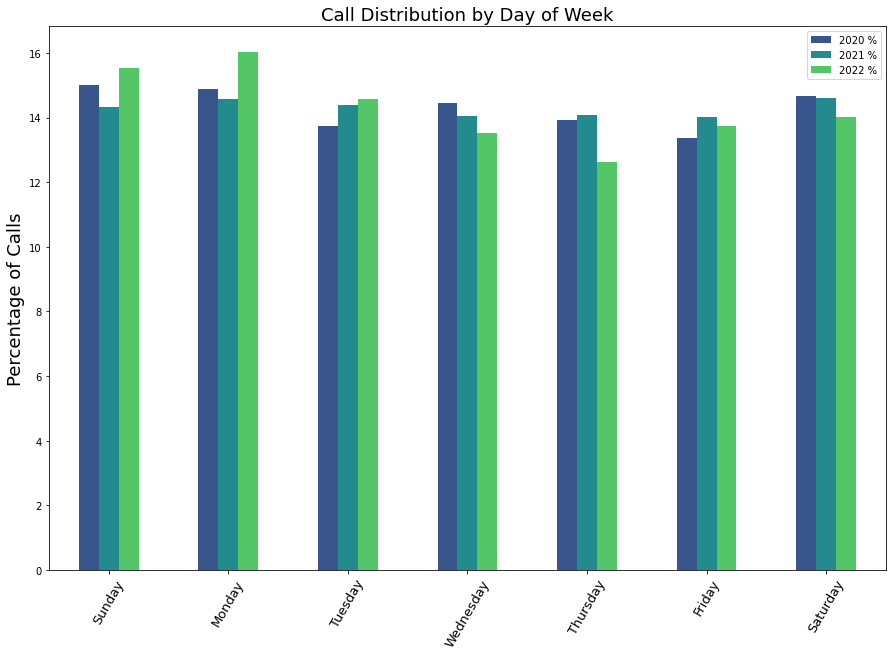

In [61]:
#plt.figure(figsize=(20,20)) #not working
#font = {'family' : 'normal',
       #'weight' : 'bold',
       #'size' : 22}
#matplotlib.rc('font', **font)
norm_day_dist.plot(x='Day', y=['2020 %', '2021 %', '2022 %'], kind='bar', color=['#39568CFF', '#238A8DFF', '#55C667FF']) #cmap='viridis')
plt.title('Call Distribution by Day of Week', fontsize=18)
plt.ylabel('Percentage of Calls', fontsize=18)
plt.xlabel('')
plt.xticks(rotation=60, fontsize=13)
#plt.legend('upper right') #this moved the legend but also changed the text... gotta revisit
plt.gcf().set_size_inches(15, 10)   #I don't know why plt.figure is so finicky but this worked
plt.show()
#I'd like to change the colors and maybe mess with the font sizes more... but that can happen later

#### Month over Month comparison

In [40]:
month_dist_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       12 non-null     object 
 1   Received    12 non-null     int64  
 2   Answered    12 non-null     int64  
 3   Unanswered  12 non-null     int64  
 4   Transfers   12 non-null     int64  
 5   % Answ      12 non-null     float64
 6   % Unansw    12 non-null     float64
 7   Avg Durat.  12 non-null     object 
 8   Avg Wait    12 non-null     object 
 9   Logins      12 non-null     int64  
 10  Logoff      12 non-null     int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 1.2+ KB


In [41]:
month_dist_2020

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,2020-01,2880,1795,1033,52,0.6413,0.3587,00:08:58,00:01:15,3160,3160
1,2020-02 (2020-02),2704,1698,936,70,0.6538,0.3462,00:10:08,00:01:03,3462,3450
2,2020-03 (2020-03),4059,2537,1347,175,0.6681,0.3319,00:08:05,00:00:54,3223,3217
3,2020-04 (2020-04),3385,2152,1147,86,0.6612,0.3388,00:09:23,00:01:04,2758,2750
4,2020-05 (2020-05),3721,2239,1388,94,0.6270,0.3730,00:10:32,00:01:18,2369,2377
5,2020-06 (2020-06),3693,2221,1413,59,0.6174,0.3826,00:10:18,00:01:10,2415,2415
6,2020-07 (2020-07),3919,2543,1296,80,0.6693,0.3307,00:10:04,00:00:58,2678,2671
7,2020-08 (2020-08),4390,2527,1803,60,0.5893,0.4107,00:10:15,00:01:23,2465,2479
8,2020-09 (2020-09),3967,2442,1464,61,0.6310,0.3690,00:10:19,00:01:16,3087,3070
9,2020-10 (2020-10),4143,2617,1480,46,0.6428,0.3572,00:09:30,00:01:19,2887,2889


In [42]:
#okay, so I need to cast the Month column (or just replace it) with the words

In [43]:
#Phil came up with a better way but I'm saving this for posterity
monthregex = r"\d{4}-\d{2} \(\d{4}-\d{2}\)"

In [44]:
#this is Phil's way thanks Phil
month_dist_2020['Month'].str.extract(r'((?<=\d{4}-)\d{2})')

,0
0,01
1,02
2,03
3,04
4,05
5,06
6,07
7,08
8,09
9,10


In [45]:
month_dist_2020['Month'] = month_dist_2020['Month'].str.extract(r'((?<=\d{4}-)\d{2})')
month_dist_2020

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,01,2880,1795,1033,52,0.6413,0.3587,00:08:58,00:01:15,3160,3160
1,02,2704,1698,936,70,0.6538,0.3462,00:10:08,00:01:03,3462,3450
2,03,4059,2537,1347,175,0.6681,0.3319,00:08:05,00:00:54,3223,3217
3,04,3385,2152,1147,86,0.6612,0.3388,00:09:23,00:01:04,2758,2750
4,05,3721,2239,1388,94,0.6270,0.3730,00:10:32,00:01:18,2369,2377
5,06,3693,2221,1413,59,0.6174,0.3826,00:10:18,00:01:10,2415,2415
6,07,3919,2543,1296,80,0.6693,0.3307,00:10:04,00:00:58,2678,2671
7,08,4390,2527,1803,60,0.5893,0.4107,00:10:15,00:01:23,2465,2479
8,09,3967,2442,1464,61,0.6310,0.3690,00:10:19,00:01:16,3087,3070
9,10,4143,2617,1480,46,0.6428,0.3572,00:09:30,00:01:19,2887,2889


In [46]:
month_text = []
for x in month_dist_2020['Month']:
    datetime_object = datetime.datetime.strptime(x, "%m")
    month_name = datetime_object.strftime("%B")
    month_text.append(month_name)

month_dist_2020['Month Text'] = month_text
month_dist_2020

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff,Month Text
0,01,2880,1795,1033,52,0.6413,0.3587,00:08:58,00:01:15,3160,3160,January
1,02,2704,1698,936,70,0.6538,0.3462,00:10:08,00:01:03,3462,3450,February
2,03,4059,2537,1347,175,0.6681,0.3319,00:08:05,00:00:54,3223,3217,March
3,04,3385,2152,1147,86,0.6612,0.3388,00:09:23,00:01:04,2758,2750,April
4,05,3721,2239,1388,94,0.6270,0.3730,00:10:32,00:01:18,2369,2377,May
5,06,3693,2221,1413,59,0.6174,0.3826,00:10:18,00:01:10,2415,2415,June
6,07,3919,2543,1296,80,0.6693,0.3307,00:10:04,00:00:58,2678,2671,July
7,08,4390,2527,1803,60,0.5893,0.4107,00:10:15,00:01:23,2465,2479,August
8,09,3967,2442,1464,61,0.6310,0.3690,00:10:19,00:01:16,3087,3070,September
9,10,4143,2617,1480,46,0.6428,0.3572,00:09:30,00:01:19,2887,2889,October


In [47]:
month_dist_2021['Month'] = month_dist_2021['Month'].str.extract(r'((?<=\d{4}-)\d{2})')
month_dist_2021

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,01,4743,3094,1556,93,0.6719,0.3281,00:08:25,00:01:02,2485,2469
1,02,4627,3103,1458,66,0.6849,0.3151,00:08:05,00:01:02,2853,2850
2,03,4700,3305,1322,73,0.7187,0.2813,00:08:59,00:01:08,3420,3414
3,04,4450,3175,1236,39,0.7222,0.2778,00:08:41,00:01:04,3103,3091
4,05,4472,2996,1390,86,0.6892,0.3108,00:09:17,00:01:08,2680,2680
5,06,4349,3065,1198,86,0.7245,0.2755,00:09:11,00:01:09,3258,3249
6,07,4591,3029,1475,87,0.6787,0.3213,00:09:18,00:01:15,2751,2778
7,08,4314,3028,1200,86,0.7218,0.2782,00:09:40,00:01:04,2939,2921
8,09,4667,3296,1304,67,0.7206,0.2794,00:09:05,00:01:00,3431,3439
9,10,4293,2878,1360,55,0.6832,0.3168,00:10:12,00:01:10,3250,3259


In [48]:
month_text = []
for x in month_dist_2021['Month']:
    datetime_object = datetime.datetime.strptime(x, "%m")
    month_name = datetime_object.strftime("%B")
    month_text.append(month_name)

month_dist_2021['Month Text'] = month_text
month_dist_2021

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff,Month Text
0,01,4743,3094,1556,93,0.6719,0.3281,00:08:25,00:01:02,2485,2469,January
1,02,4627,3103,1458,66,0.6849,0.3151,00:08:05,00:01:02,2853,2850,February
2,03,4700,3305,1322,73,0.7187,0.2813,00:08:59,00:01:08,3420,3414,March
3,04,4450,3175,1236,39,0.7222,0.2778,00:08:41,00:01:04,3103,3091,April
4,05,4472,2996,1390,86,0.6892,0.3108,00:09:17,00:01:08,2680,2680,May
5,06,4349,3065,1198,86,0.7245,0.2755,00:09:11,00:01:09,3258,3249,June
6,07,4591,3029,1475,87,0.6787,0.3213,00:09:18,00:01:15,2751,2778,July
7,08,4314,3028,1200,86,0.7218,0.2782,00:09:40,00:01:04,2939,2921,August
8,09,4667,3296,1304,67,0.7206,0.2794,00:09:05,00:01:00,3431,3439,September
9,10,4293,2878,1360,55,0.6832,0.3168,00:10:12,00:01:10,3250,3259,October


In [49]:
month_dist_2022['Month'] = month_dist_2022['Month'].str.extract(r'((?<=\d{4}-)\d{2})')
month_dist_2022

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,01,5090,3696,1329,65,0.7389,0.2611,00:09:38,00:00:58,3408,3426
1,02,4127,3236,840,51,0.7965,0.2035,00:09:12,00:00:49,3568,3559
2,03,4034,3080,898,56,0.7774,0.2226,00:10:07,00:00:53,3688,3704
3,04,4014,3189,779,46,0.8059,0.1941,00:09:49,00:00:46,3834,3825


In [50]:
month_text = []
for x in month_dist_2022['Month']:
    datetime_object = datetime.datetime.strptime(x, "%m")
    month_name = datetime_object.strftime("%B")
    month_text.append(month_name)

month_dist_2022['Month Text'] = month_text
month_dist_2022

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff,Month Text
0,01,5090,3696,1329,65,0.7389,0.2611,00:09:38,00:00:58,3408,3426,January
1,02,4127,3236,840,51,0.7965,0.2035,00:09:12,00:00:49,3568,3559,February
2,03,4034,3080,898,56,0.7774,0.2226,00:10:07,00:00:53,3688,3704,March
3,04,4014,3189,779,46,0.8059,0.1941,00:09:49,00:00:46,3834,3825,April


In [51]:
months_20 = month_dist_2020[['Month Text', 'Received']]
months_20.rename(columns= {'Month Text':'Month', 'Received':'2020 Received'}, inplace=True)
months_20['2020 %'] = (months_20['2020 Received'] / months_20['2020 Received'].sum()) * 100
months_20

C:\Users\ating\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\ating\AppData\Local\Temp/ipykernel_11516/1236613616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  months_20['2020 %'] = (months_20['2020 Received'] / months_20['2020 Received'].sum()) * 100


,Month,2020 Received,2020 %
0,January,2880,6.292056
1,February,2704,5.907542
2,March,4059,8.867867
3,April,3385,7.395351
4,May,3721,8.129424
5,June,3693,8.068251
6,July,3919,8.562003
7,August,4390,9.591016
8,September,3967,8.666871
9,October,4143,9.051385


In [52]:
months_21 = month_dist_2021[['Month Text', 'Received']]
months_21.rename(columns= {'Month Text':'Month', 'Received':'2021 Received'}, inplace=True)
months_21['2021 %'] = (months_21['2021 Received'] / months_21['2021 Received'].sum()) * 100
months_21

C:\Users\ating\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\ating\AppData\Local\Temp/ipykernel_11516/2589415201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  months_21['2021 %'] = (months_21['2021 Received'] / months_21['2021 Received'].sum()) * 100


,Month,2021 Received,2021 %
0,January,4743,8.787402
1,February,4627,8.572487
2,March,4700,8.707735
3,April,4450,8.244558
4,May,4472,8.285317
5,June,4349,8.057434
6,July,4591,8.505790
7,August,4314,7.992589
8,September,4667,8.646596
9,October,4293,7.953682


In [53]:
months_22 = month_dist_2022[['Month Text', 'Received']]
months_22.rename(columns= {'Month Text':'Month', 'Received':'2022 Received'}, inplace=True)
months_22['2022 %'] = (months_22['2022 Received'] / months_22['2022 Received'].sum()) * 100
months_22

C:\Users\ating\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\ating\AppData\Local\Temp/ipykernel_11516/914334700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  months_22['2022 %'] = (months_22['2022 Received'] / months_22['2022 Received'].sum()) * 100


,Month,2022 Received,2022 %
0,January,5090,29.481610
1,February,4127,23.903852
2,March,4034,23.365190
3,April,4014,23.249348


In [54]:
norm_month_dist = pd.merge(months_20, months_21, on='Month', how='outer')
norm_month_dist = pd.merge(norm_month_dist, months_22, on='Month', how='outer')
norm_month_dist

,Month,2020 Received,2020 %,2021 Received,2021 %,2022 Received,2022 %
0,January,2880,6.292056,4743,8.787402,5090.0,29.481610
1,February,2704,5.907542,4627,8.572487,4127.0,23.903852
2,March,4059,8.867867,4700,8.707735,4034.0,23.365190
3,April,3385,7.395351,4450,8.244558,4014.0,23.249348
4,May,3721,8.129424,4472,8.285317,NaN,NaN
5,June,3693,8.068251,4349,8.057434,NaN,NaN
6,July,3919,8.562003,4591,8.505790,NaN,NaN
7,August,4390,9.591016,4314,7.992589,NaN,NaN
8,September,3967,8.666871,4667,8.646596,NaN,NaN
9,October,4143,9.051385,4293,7.953682,NaN,NaN


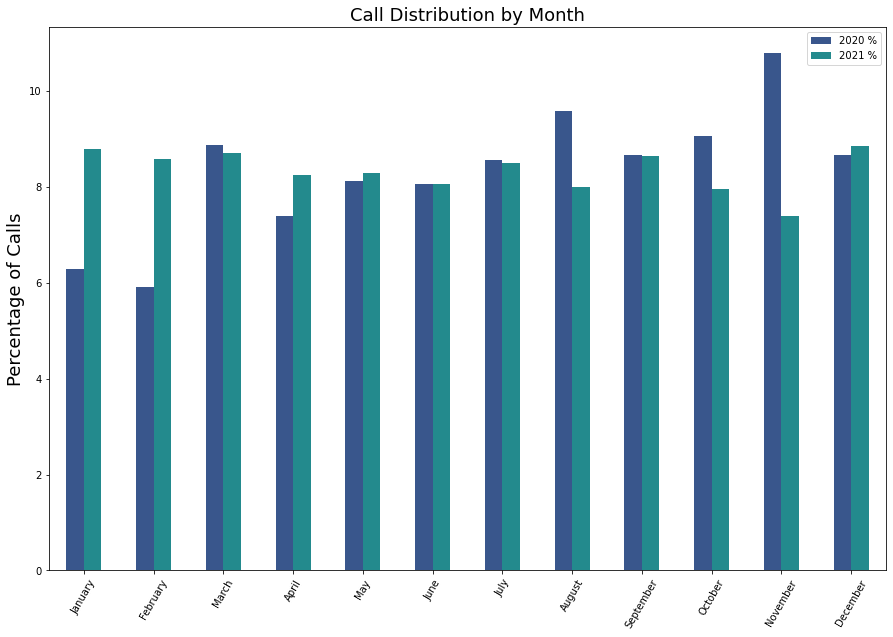

In [59]:
#plt.figure(figsize=(20,20)) #not working
#font = {'family' : 'normal',
       #'weight' : 'bold',
       #'size' : 22}
#matplotlib.rc('font', **font)
norm_month_dist.plot(x='Month', y=['2020 %', '2021 %'], kind='bar', color=['#39568CFF', '#238A8DFF'])#cmap='viridis')
#deleted " , '2022 %' " from the .plot script because the 4-month data skews it
plt.title('Call Distribution by Month', fontsize=18)
plt.ylabel('Percentage of Calls', fontsize=18)
plt.xlabel('')
plt.xticks(rotation=60)
#plt.legend('upper right') #this moved the legend but also changed the text... gotta revisit
plt.gcf().set_size_inches(15, 10)   #I don't know why plt.figure is so finicky but this worked
plt.show()
#I'd like to change the colors and maybe mess with the font sizes more... but that can happen later

In [56]:
#spent all night doing project management stuff and helping other people oops

In [57]:
#here are some codes I have from others that I want to test out with my own data tomorrow

FROM CAITLYN for matplotlib color selection
ax = phoneline.plot(kind='bar', figsize=(7,5), xlabel='Phone Line', ylabel='Call Volume', rot=0, color=['#440154', '#3B528B', '#21918C'])
ax.legend(title='Call Year', bbox_to_anchor=(1,1), loc='upper left')
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig('Annual Call Volume by Phone Line')
plt.show();

Iulia has a few on her datacampers branch that I need to look at